### Custom EDA functions: Target variable against numeric and categorical features

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def eda_bivariate_binary_against_numerical(data, binary_target, predictor):
    # Create subplots for histogram, boxplot, and average plot
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    # Plot histogram distribution of the predictor across binary_target
    sns.histplot(data=data, x=predictor, hue=binary_target, multiple="stack", ax=axes[0])
    axes[0].set_title("Distribution of {} across {}".format(predictor, binary_target))

    # Plot boxplots of the predictor across binary_target
    sns.boxplot(data=data, x=binary_target, y=predictor, ax=axes[1])
    axes[1].set_title("Distribution of {} across {}".format(predictor, binary_target))

    # Calculate mean of the predictor per value of binary_target
    mean_values = data.groupby(binary_target)[predictor].mean()
    
    # Plot average value of the predictor per value of binary_target
    targets = data[binary_target].unique()
    bar_positions = np.arange(len(targets))
    bar_heights = [mean_values[t] for t in targets]
    
    axes[2].bar(bar_positions, bar_heights, color='blue')
    axes[2].set_xticks(bar_positions)
    axes[2].set_xticklabels(targets)
    axes[2].set_title("Average value of {} across {}".format(predictor, binary_target))

    # Display the mean values on top of each bar
    for i, height in enumerate(bar_heights):
        axes[2].text(i, height, round(height, 2), ha='center', va='bottom', color='black')

    # Adjust the layout and display the plots
    plt.tight_layout()
    plt.show()

In [2]:
# Automating bi variate analysis against categorical predictors. Proportion of target, and absolute amount of target 
def eda_bivariate_binary_against_categorical(data, binary_target, predictor):
    # Create subplots for proportion and count plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # Plot proportion of binary_target across predictor categories
    prop_data = data.groupby(predictor)[binary_target].value_counts(normalize=True).unstack()
    prop_data = prop_data.round(2)  # Round the proportions to 2 decimal places
    prop_data.plot(kind='bar', stacked=False, ax=axes[0], width=0.8)  # Set stacked=False and adjust width
    axes[0].set_title("Proportion of {} across {} categories".format(binary_target, predictor))
    axes[0].legend(title=binary_target)
    for p in axes[0].patches:
        axes[0].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                         va='bottom')

    # Plot absolute amount of binary_target across predictor categories
    count_data = data.groupby(predictor)[binary_target].value_counts().unstack()
    count_data.plot(kind='bar', stacked=False, ax=axes[1], width=0.8)  # Set stacked=False and adjust width
    axes[1].set_title("Absolute amount of {} across {} categories".format(binary_target, predictor))
    axes[1].legend(title=binary_target)
    for p in axes[1].patches:
        axes[1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center',
                         va='bottom')

    # Adjust the layout and display the plots
    plt.tight_layout()
    plt.show()

In [3]:
df = pd.read_csv('Churn_Modelling.csv') 

## Separating out different columns into various categories as defined above. Depending on the type of the predictor, different visualisations are going to be made
target_var = ['Exited']
cols_to_remove = ['RowNumber', 'CustomerId','Surname'] #We also remove Surname, as it may cause some ethics issue. + GDPR
num_feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_feats = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

## Separating out target variable and removing the non-essential columns
y = df[target_var].values
df.drop(cols_to_remove, axis=1, inplace=True)

### Target variable against numerical features

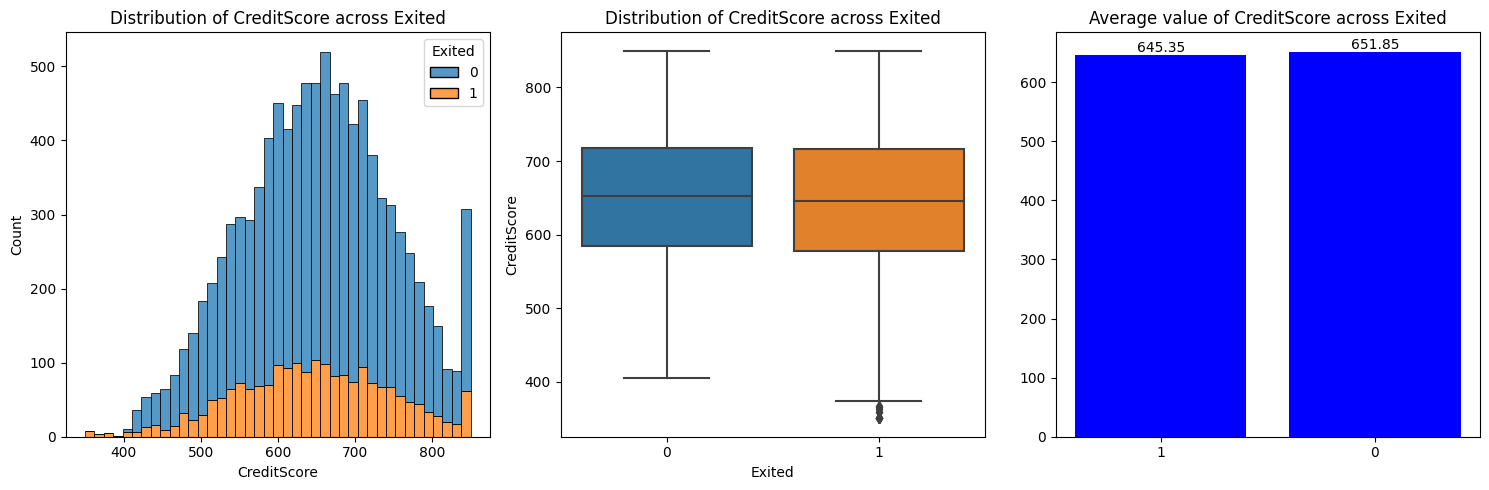

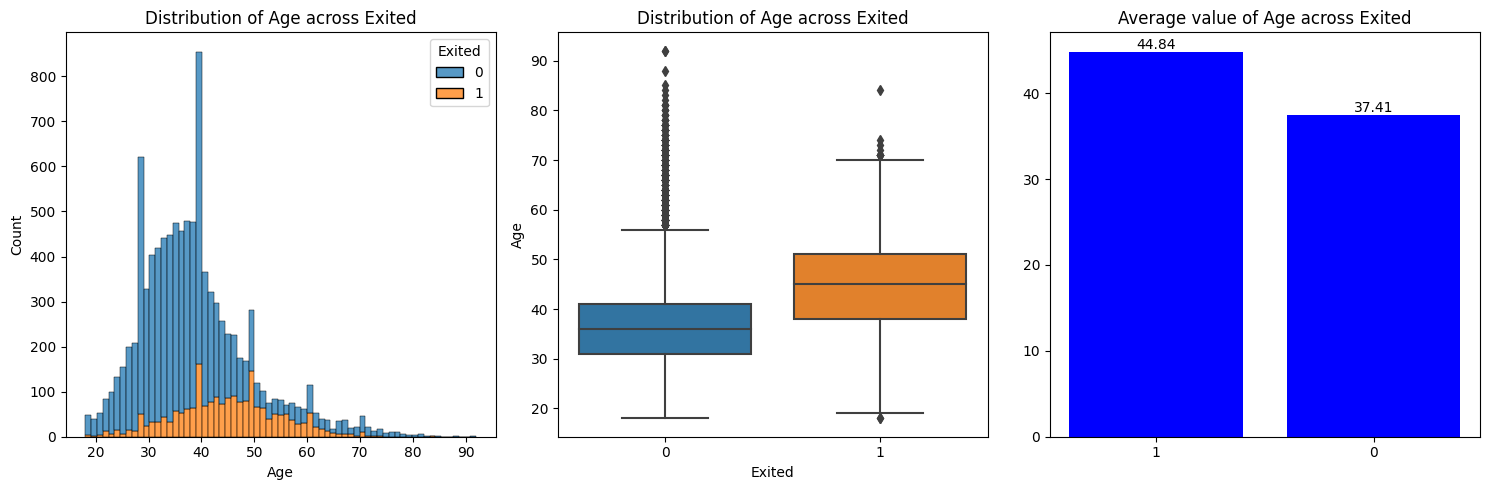

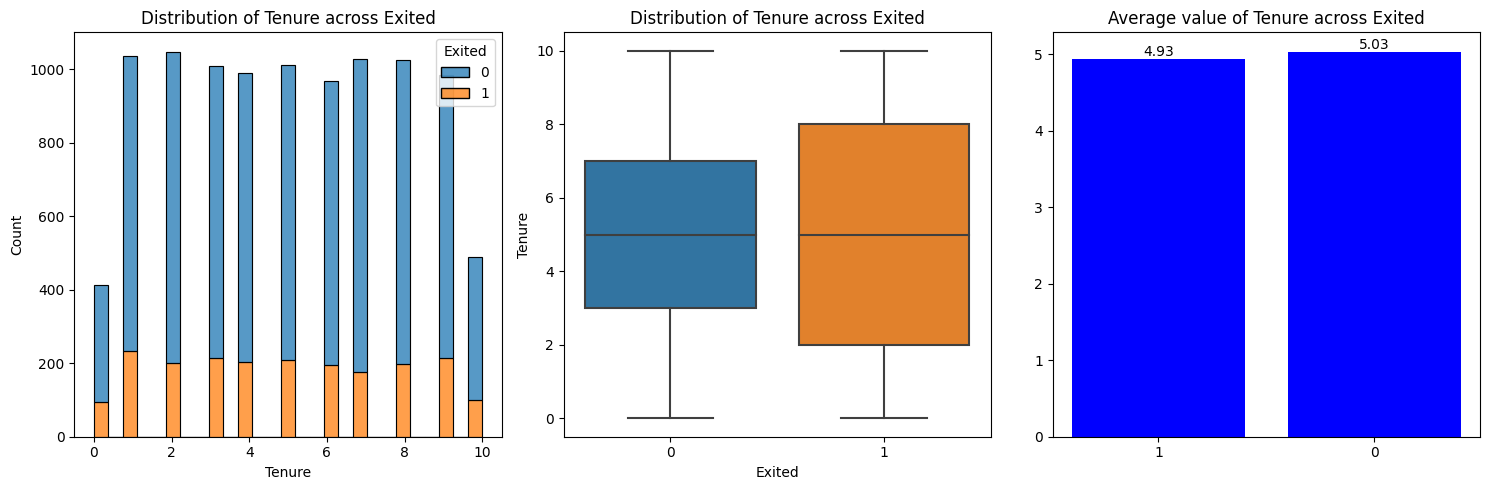

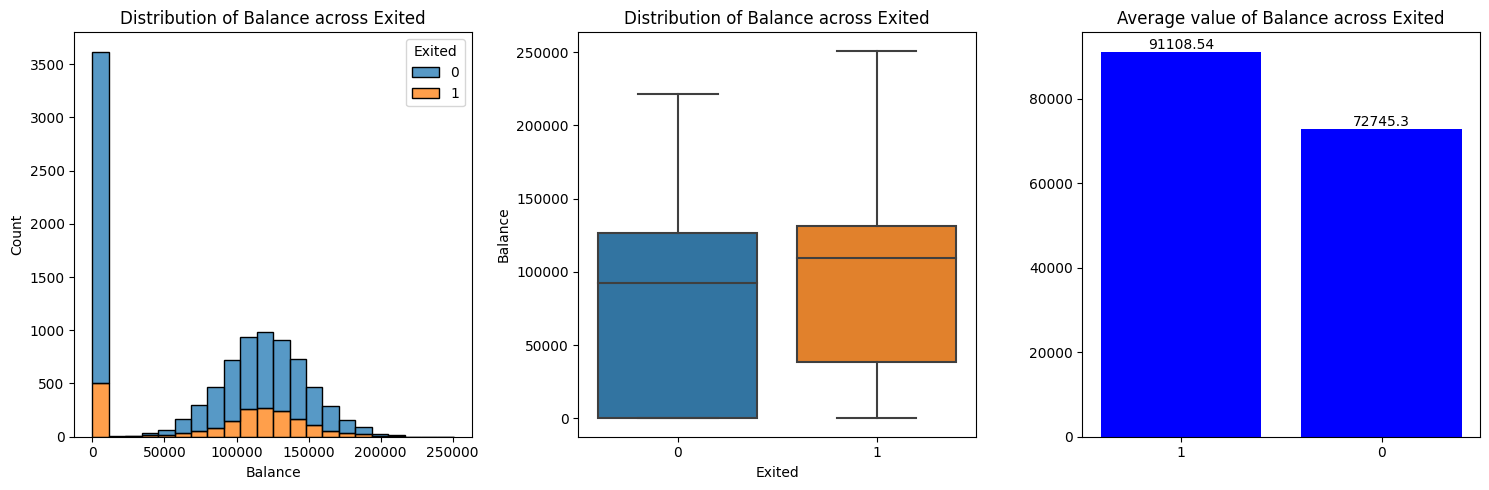

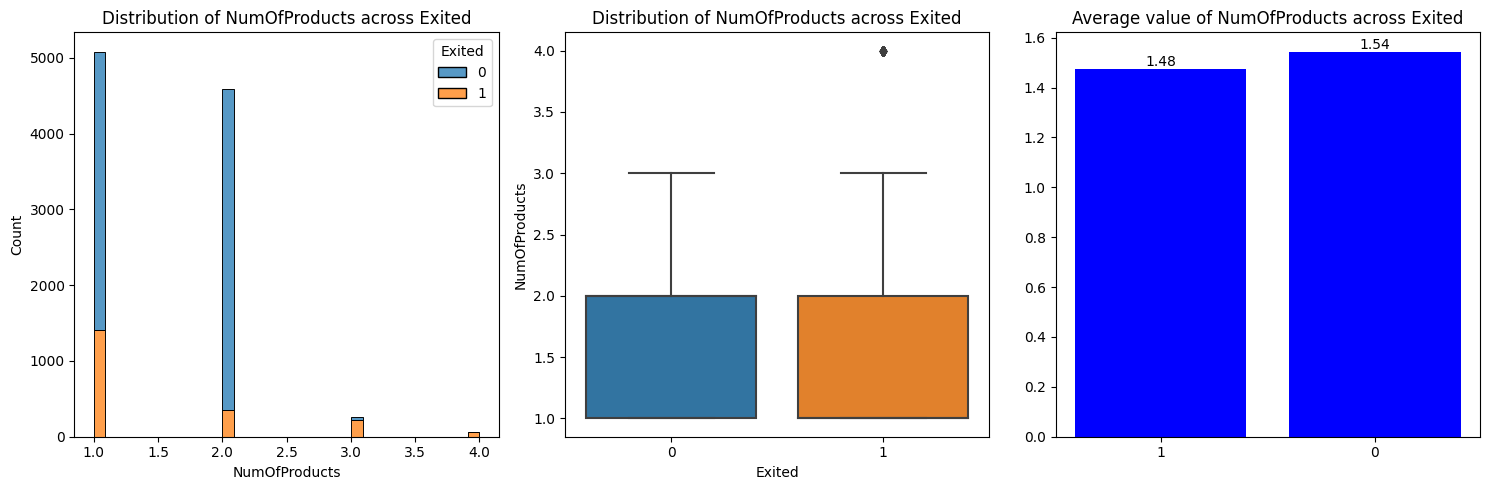

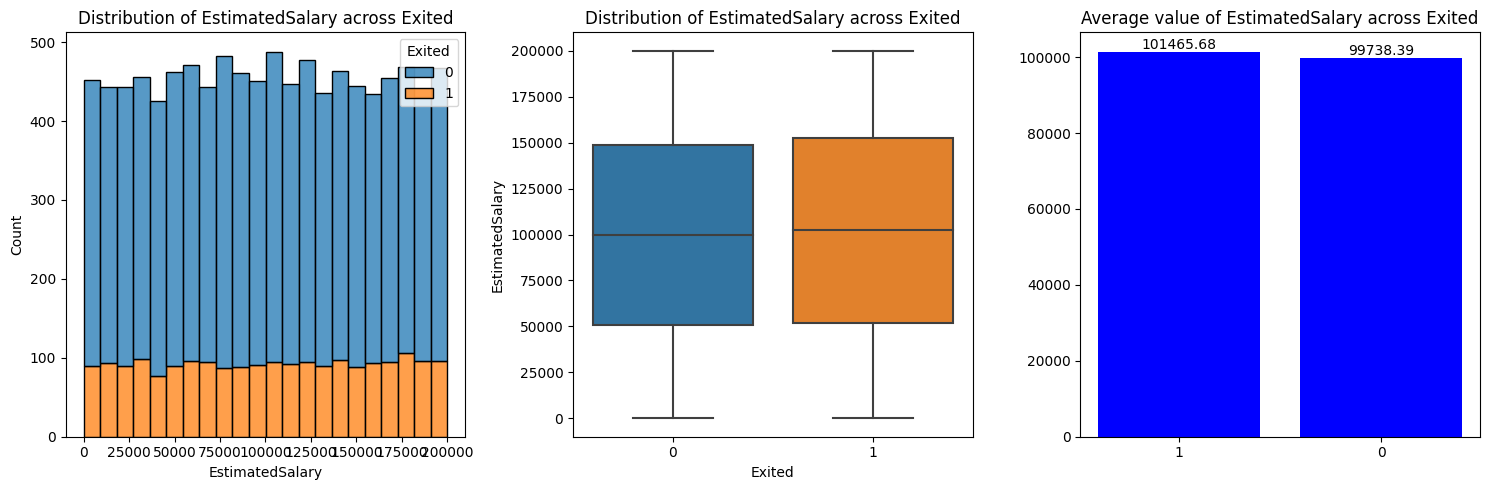

In [4]:
for num_feat in num_feats:
    eda_bivariate_binary_against_numerical(df,'Exited',num_feat)

### Target variable against categorical features: Proportions

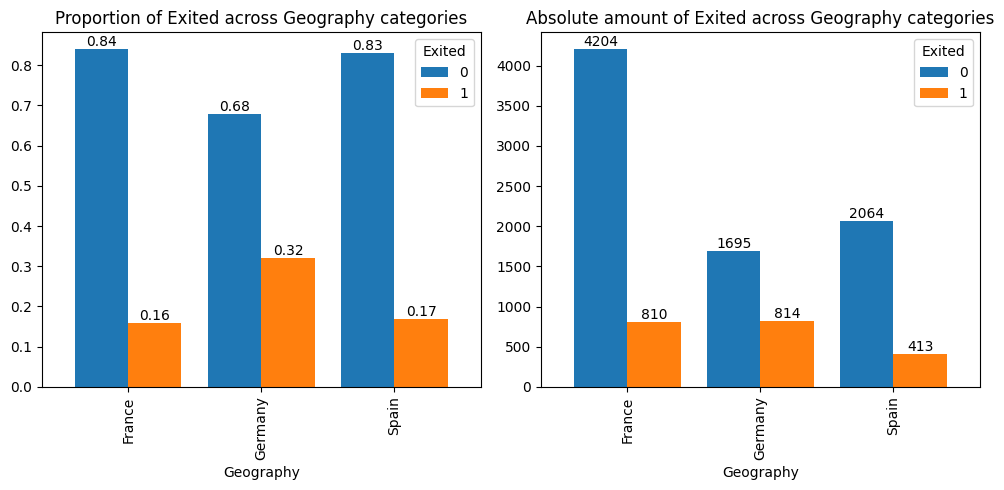

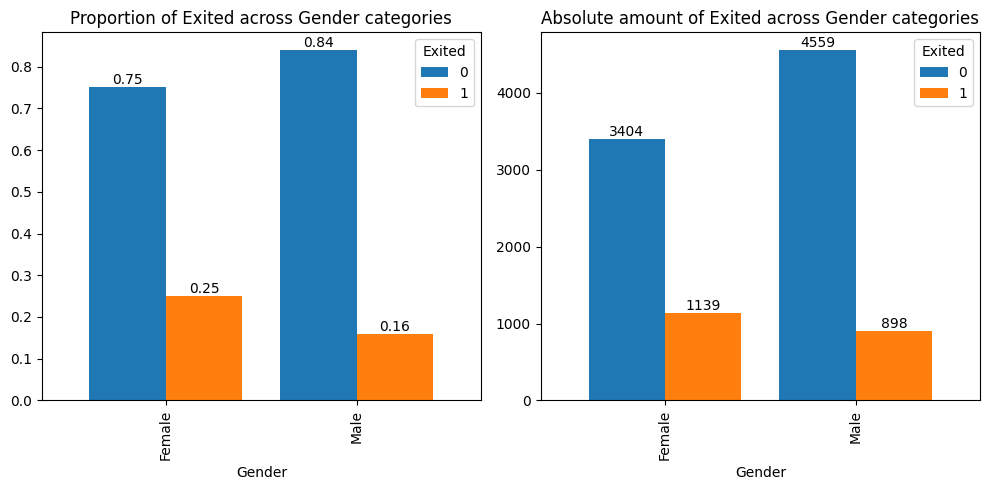

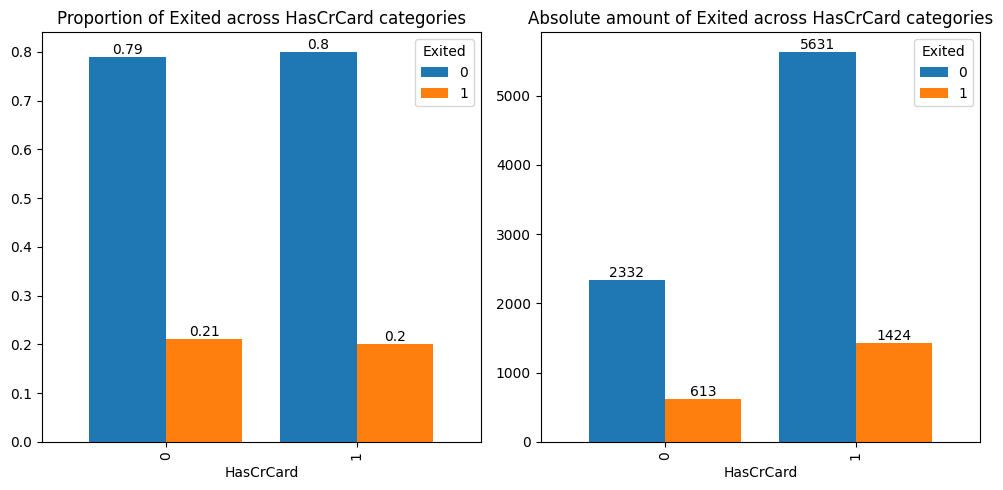

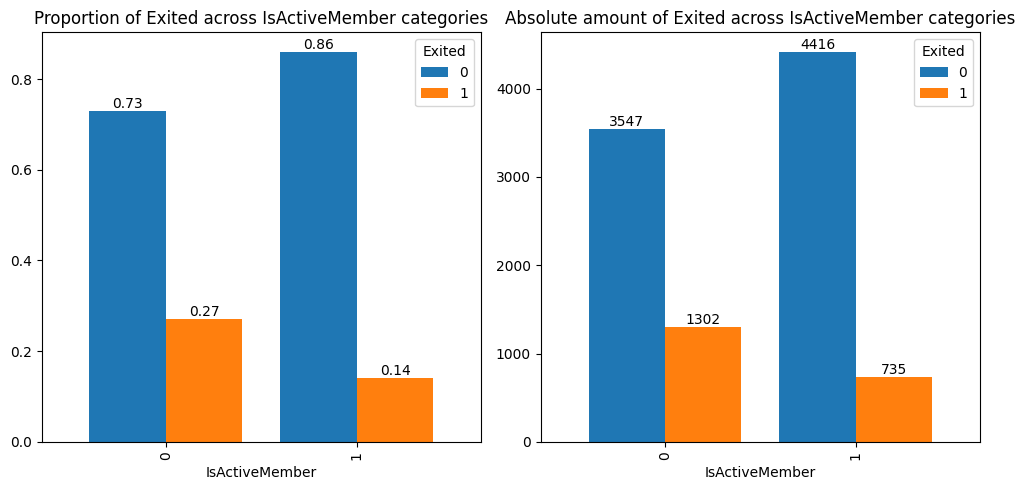

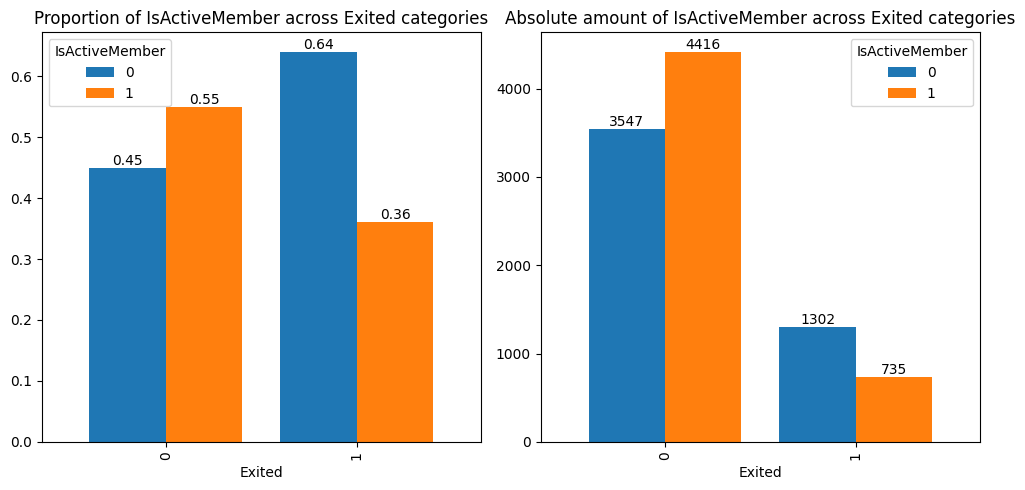

In [5]:
for cat_feat in cat_feats:
    eda_bivariate_binary_against_categorical(df, 'Exited', cat_feat)
    
eda_bivariate_binary_against_categorical(df, 'IsActiveMember', 'Exited')